In [1]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('/kaggle/input/spaceship-titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
modes = df.mode().iloc[0]
modes

PassengerId                0001_01
HomePlanet                   Earth
CryoSleep                    False
Cabin                      G/734/S
Destination            TRAPPIST-1e
Age                           24.0
VIP                          False
RoomService                    0.0
FoodCourt                      0.0
ShoppingMall                   0.0
Spa                            0.0
VRDeck                         0.0
Name            Alraium Disivering
Transported                   True
Name: 0, dtype: object

In [6]:
df.fillna(modes, inplace=True)

In [7]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [8]:
df.describe(include=[np.number])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df.describe(include=[bool])

,CryoSleep,VIP,Transported
count,8693,8693,8693
unique,2,2,2
top,False,False,True
freq,5656,8494,4378


<Axes: >

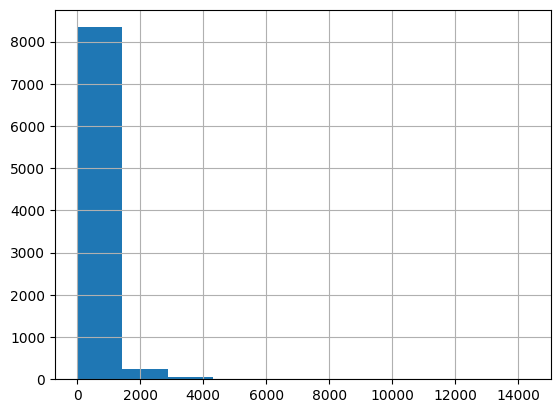

In [10]:
df['RoomService'].hist()

In [11]:
cols_to_log = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for col in cols_to_log:
    df["Log"+col] = np.log(df[col]+1)

<Axes: >

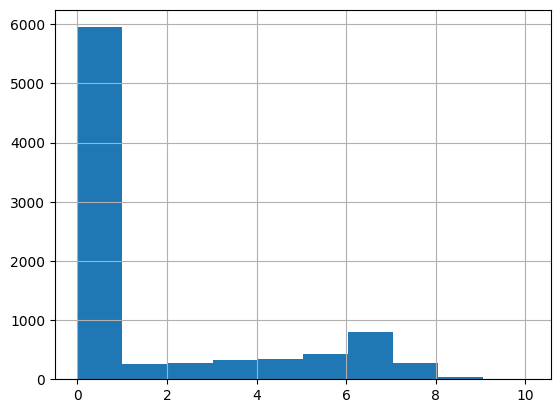

In [12]:
df["LogShoppingMall"].hist()

In [13]:
destinations = sorted(df.Destination.unique())
destinations

['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']

In [14]:
df.describe(include=[object])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering
freq,1,4803,207,6097,202


In [15]:
df = pd.get_dummies(df, columns=["HomePlanet", "Destination"], dtype=np.uint8)

In [16]:
df['HomePlanet_Earth'].dtype

dtype('uint8')

In [17]:
added_cols = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
df[added_cols].head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,0,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,1,0,0,0,0,1


In [18]:
from torch import tensor

t_dep = tensor(df.Transported, dtype=torch.float)
t_dep

tensor([0., 1., 0., 0., 1., 1., 1.,  ..., 0., 1., 0., 0., 1., 0., 1.])

In [19]:
t_dep.shape

torch.Size([8693])

In [20]:
df.describe(include=[object])

,PassengerId,Cabin,Name
count,8693,8693,8693
unique,8693,6560,8473
top,0001_01,G/734/S,Alraium Disivering
freq,1,207,202


In [21]:
df.describe(include=[np.number])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820,1.735295,1.906543,1.599415,1.838851,1.757950,0.552514,0.245140,0.202347,0.207063,0.091568,0.701369
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2.719285,2.932951,2.567446,2.769368,2.746810,0.497263,0.430195,0.401772,0.405224,0.288432,0.457684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,3.737670,4.127134,3.135494,3.988984,3.713572,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9.569971,10.302733,10.064458,10.017218,10.091377,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.describe(include=[bool])

,CryoSleep,VIP,Transported
count,8693,8693,8693
unique,2,2,2
top,False,False,True
freq,5656,8494,4378


In [23]:
df[["VIP", "CryoSleep"]] = df[["VIP", "CryoSleep"]].astype(np.uint8)

In [24]:
indep_cols = ['CryoSleep', 'VIP', 'Age', 'LogRoomService', 'LogFoodCourt', 'LogShoppingMall', 'LogSpa', 'LogVRDeck'] + added_cols
df[indep_cols].dtypes

CryoSleep                      uint8
VIP                            uint8
Age                          float64
LogRoomService               float64
LogFoodCourt                 float64
LogShoppingMall              float64
LogSpa                       float64
LogVRDeck                    float64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
dtype: object

In [25]:
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[ 0.0000,  0.0000, 39.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  0.0000, 24.0000,  4.7005,  2.3026,  3.2581,  6.3099,  3.8067,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  1.0000, 58.0000,  3.7842,  8.1823,  0.0000,  8.8122,  3.9120,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  0.0000, 33.0000,  0.0000,  7.1577,  5.9189,  8.1107,  5.2679,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  0.0000, 16.0000,  5.7170,  4.2627,  5.0239,  6.3386,  1.0986,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [ 0.0000,  0.0000, 44.0000,  0.0000,  6.1821,  0.0000,  5.6768,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000, 26.0000,  3.7612,  7.3395,  1.3863,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [ 0.0000,  0.0000, 32.0000,

In [26]:
t_indep.shape

torch.Size([8693, 14])

In [27]:
torch.manual_seed(422)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.2020, -0.1287,  0.0531, -0.1543, -0.4534, -0.3952, -0.1071,  0.2316,  0.4959, -0.4638, -0.0450,  0.4065,  0.1490,  0.4168])

In [28]:
t_indep*coeffs

tensor([[-0.0000, -0.0000,  2.0699, -0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -0.4638, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  1.2738, -0.7255, -1.0440, -1.2875, -0.6758,  0.8816,  0.4959, -0.0000, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.1287,  3.0784, -0.5841, -3.7100, -0.0000, -0.9438,  0.9060,  0.0000, -0.4638, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  1.7515, -0.0000, -3.2454, -2.3389, -0.8687,  1.2199,  0.0000, -0.4638, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  0.8492, -0.8824, -1.9328, -1.9853, -0.6789,  0.2544,  0.4959, -0.0000, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  2.3353, -0.0000, -2.8030, -0.0000, -0.6080,  0.0000,  0.4959, -0.0000, -0.0000,  0.0000,  0.1490,  0.0000],
        [-0.0000, -0.0000,  1.3800, -0.5805, -3.3278, -0.5478, -0.0000,  0.0000,  0.4959, -0.0000, -0.0000,  0.0000,  0.0000,  0.4168],
        ...,
        [-0.0000, -0.0000,  1.6984,

In [29]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [30]:
t_indep*coeffs

tensor([[-0.0000, -0.0000,  0.0262, -0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -0.4638, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  0.0161, -0.0758, -0.1013, -0.1279, -0.0675,  0.0874,  0.4959, -0.0000, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.1287,  0.0390, -0.0610, -0.3601, -0.0000, -0.0942,  0.0898,  0.0000, -0.4638, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  0.0222, -0.0000, -0.3150, -0.2324, -0.0867,  0.1209,  0.0000, -0.4638, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  0.0107, -0.0922, -0.1876, -0.1973, -0.0678,  0.0252,  0.4959, -0.0000, -0.0000,  0.0000,  0.0000,  0.4168],
        [-0.0000, -0.0000,  0.0296, -0.0000, -0.2721, -0.0000, -0.0607,  0.0000,  0.4959, -0.0000, -0.0000,  0.0000,  0.1490,  0.0000],
        [-0.0000, -0.0000,  0.0175, -0.0607, -0.3230, -0.0544, -0.0000,  0.0000,  0.4959, -0.0000, -0.0000,  0.0000,  0.0000,  0.4168],
        ...,
        [-0.0000, -0.0000,  0.0215,

In [31]:
preds = (t_indep*coeffs).sum(axis=1)

In [32]:
preds[:10]

tensor([-0.0208,  0.6437, -0.5624, -0.5381,  0.4038,  0.3417,  0.4921,  0.7295,  0.4718, -0.2499])

In [33]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.6413)

In [34]:
def calc_preds(coeffs, indeps):
    return (indeps*coeffs).sum(axis=1)

def calc_loss(coeffs, indeps, deps):
    return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [35]:
coeffs.requires_grad_()

tensor([-0.2020, -0.1287,  0.0531, -0.1543, -0.4534, -0.3952, -0.1071,  0.2316,  0.4959, -0.4638, -0.0450,  0.4065,  0.1490,  0.4168],
       requires_grad=True)

In [36]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.6260)


In [37]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [38]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(6955, 1738)

In [39]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [40]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [41]:
def init_coeffs():
    return (torch.rand(n_coeff)-0.5).requires_grad_()

In [42]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(422)
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs, lr=lr)
    return coeffs

In [43]:
coeffs = train_model(50, lr=0.15)

0.642; 0.619; 0.597; 0.577; 0.558; 0.540; 0.524; 0.509; 0.496; 0.484; 0.472; 0.460; 0.449; 0.437; 0.426; 0.415; 0.404; 0.393; 0.383; 0.373; 0.363; 0.356; 0.350; 0.346; 0.342; 0.338; 0.336; 0.334; 0.332; 0.330; 0.329; 0.328; 0.329; 0.330; 0.327; 0.327; 0.325; 0.324; 0.323; 0.323; 0.321; 0.320; 0.320; 0.320; 0.317; 0.316; 0.317; 0.317; 0.314; 0.313; 

In [44]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'CryoSleep': tensor(0.4754),
 'VIP': tensor(-0.0548),
 'Age': tensor(0.0172),
 'LogRoomService': tensor(-0.3557),
 'LogFoodCourt': tensor(-0.2354),
 'LogShoppingMall': tensor(-0.2772),
 'LogSpa': tensor(-0.2858),
 'LogVRDeck': tensor(-0.0913),
 'HomePlanet_Earth': tensor(0.0350),
 'HomePlanet_Europa': tensor(0.0792),
 'HomePlanet_Mars': tensor(0.0767),
 'Destination_55 Cancri e': tensor(0.4318),
 'Destination_PSO J318.5-22': tensor(0.3391),
 'Destination_TRAPPIST-1e': tensor(0.4053)}

In [45]:
preds = calc_preds(coeffs, val_indep)

In [46]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True, False,  True, False,  True, False, False,  True,  True,  True,  True,  True, False,  True, False])

In [47]:
results.float().mean()

tensor(0.7140)

In [48]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7140)

In [49]:
preds[:28]

tensor([ 0.1003,  0.9667,  0.3745,  0.9989, -0.0130,  0.2038,  0.4906,  0.0551,  0.0227,  0.0336, -0.0853,  0.9902,  0.1686,  0.9208,
        -0.2377,  0.4670,  0.0445,  0.4396,  0.0161,  0.2290,  0.0787,  0.1916,  0.0866,  0.1012, -0.0671,  0.1255, -0.0816,  0.4819])

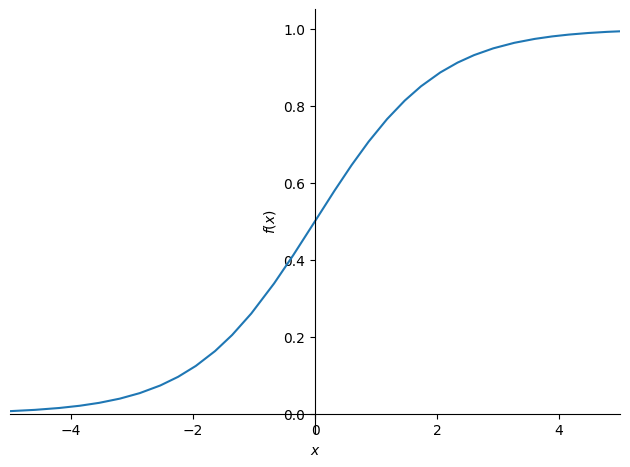

In [50]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [51]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [52]:
coeffs = train_model(50, lr=600)

0.518; 0.266; 0.265; 0.262; 0.259; 0.258; 0.257; 0.257; 0.256; 0.255; 0.255; 0.254; 0.253; 0.253; 0.252; 0.252; 0.251; 0.250; 0.249; 0.248; 0.247; 0.246; 0.243; 0.239; 0.235; 0.232; 0.231; 0.230; 0.230; 0.229; 0.229; 0.229; 0.229; 0.229; 0.229; 0.229; 0.229; 0.230; 0.228; 0.229; 0.228; 0.229; 0.228; 0.228; 0.228; 0.228; 0.228; 0.228; 0.227; 0.227; 

In [53]:
acc(coeffs)

tensor(0.7716)

In [54]:
show_coeffs()

{'CryoSleep': tensor(32.2734),
 'VIP': tensor(0.6252),
 'Age': tensor(-1.2934),
 'LogRoomService': tensor(-17.3818),
 'LogFoodCourt': tensor(5.9698),
 'LogShoppingMall': tensor(3.8169),
 'LogSpa': tensor(-18.9256),
 'LogVRDeck': tensor(-19.1634),
 'HomePlanet_Earth': tensor(1.3449),
 'HomePlanet_Europa': tensor(8.6274),
 'HomePlanet_Mars': tensor(2.3467),
 'Destination_55 Cancri e': tensor(5.0209),
 'Destination_PSO J318.5-22': tensor(3.5860),
 'Destination_TRAPPIST-1e': tensor(4.6973)}

In [55]:
tst_df = pd.read_csv(path/'test.csv')

In [56]:
tst_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [57]:
tst_df.fillna(modes, inplace=True)

cols_to_log = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for col in cols_to_log:
    tst_df["Log"+col] = np.log(tst_df[col]+1)

tst_df = pd.get_dummies(tst_df, columns=["HomePlanet", "Destination"], dtype=np.uint8)

tst_df[["VIP", "CryoSleep"]] = tst_df[["VIP", "CryoSleep"]].astype(np.uint8)

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [58]:
tst_df[indep_cols].columns

Index(['CryoSleep', 'VIP', 'Age', 'LogRoomService', 'LogFoodCourt', 'LogShoppingMall', 'LogSpa', 'LogVRDeck', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [59]:
tst_df['Transported'] = (calc_preds(tst_indep, coeffs)>0.5)

In [60]:
sub_df = tst_df[['PassengerId','Transported']]
sub_df.to_csv('sub.csv', index=False)

In [61]:
!head sub.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,True
0027_01,False
0029_01,True
0032_01,True
0032_02,True


In [62]:
(val_indep*coeffs).sum(axis=1)

tensor([ -4.4778,  38.6135,   4.8981,  44.9885,   3.0482, -12.4842,  12.8663,  ...,   2.8845, -17.8259, -14.5993,  37.9227,  38.6299,
         -6.2551,  45.4960])

In [63]:
val_indep@coeffs

tensor([ -4.4778,  38.6135,   4.8981,  44.9885,   3.0482, -12.4842,  12.8663,  ...,   2.8845, -17.8259, -14.5993,  37.9227,  38.6299,
         -6.2551,  45.4960])

In [64]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [65]:
def init_coeffs(): return (torch.rand(n_coeff, 1)-0.5).requires_grad_()

In [66]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [67]:
coeffs = train_model(50, lr=600)

0.518; 0.266; 0.265; 0.262; 0.259; 0.258; 0.257; 0.257; 0.256; 0.255; 0.255; 0.254; 0.253; 0.253; 0.252; 0.252; 0.251; 0.250; 0.249; 0.248; 0.247; 0.246; 0.243; 0.239; 0.235; 0.232; 0.231; 0.230; 0.230; 0.229; 0.229; 0.229; 0.229; 0.229; 0.229; 0.229; 0.229; 0.230; 0.228; 0.229; 0.228; 0.229; 0.228; 0.228; 0.228; 0.228; 0.228; 0.228; 0.227; 0.227; 

In [68]:
acc(coeffs)

tensor(0.7716)

In [69]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(),const.requires_grad_()

In [70]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [71]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [72]:
coeffs = train_model(200,lr=35)

0.499; 0.433; 0.359; 0.471; 0.270; 0.264; 0.259; 0.257; 0.256; 0.254; 0.255; 0.254; 0.259; 0.251; 0.252; 0.256; 0.248; 0.246; 0.245; 0.244; 0.248; 0.266; 0.254; 0.245; 0.243; 0.238; 0.233; 0.231; 0.230; 0.230; 0.231; 0.234; 0.234; 0.241; 0.230; 0.229; 0.230; 0.229; 0.229; 0.228; 0.228; 0.227; 0.227; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.226; 0.225; 0.226; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.224; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.225; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.224; 0.223; 0.223; 0.223; 0.223; 0.223; 0.223; 0.223; 0.223; 0.223; 0.224; 0.224; 0.225; 0.225; 0.224; 0.224; 0.223; 0.223; 0.223; 0.222; 0.223; 0.223; 0.224; 0.223; 0.223; 0.222; 0.222; 0.221; 0.223; 0.222; 0.223; 0.222; 0.222; 0.221; 0.222; 0.221; 0.224; 0.222; 0.222; 0.220; 0.221;

In [73]:
acc(coeffs)

tensor(0.7762)

In [146]:
def init_coeffs():
    hiddens = [10,10,10,10]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.5)/sizes[i+1]*10 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [147]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [148]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [ ]:
coeffs = train_model(755,lr=3.8)

700 4.39
10,10,10

In [185]:
acc(coeffs)

tensor(0.7871)

In [187]:
tst_df['Transported'] = (calc_preds(coeffs,tst_indep)>0.5)

In [189]:
sub_df = tst_df[['PassengerId','Transported']]
sub_df.to_csv('sub-deep.csv', index=False)

In [190]:
!head sub-deep.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,True
0029_01,True
0032_01,True
0032_02,True
